In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import analysis as an
from pathlib import Path

project_folder = Path(an.__file__).parent.parent.resolve()

# plt.style.use('seaborn')
sns.set_context('paper', font_scale=2)
sns.set_style('whitegrid')
sns.set_color_codes('deep')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Connectivity Analysis


In [2]:
data_folder = project_folder / 'experiment' / 'data'
results_folder = project_folder / 'results'
results_folder.mkdir(exist_ok=True)
print(f'Storing results in: {results_folder}')
print('Available data paths:')
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]


Storing results in: /home/chwalisz/Code/twist/experiments/walker/results
Available data paths:


[PosixPath('/home/chwalisz/Code/twist/experiments/walker/experiment/data/2018-01-11-182755'),
 PosixPath('/home/chwalisz/Code/twist/experiments/walker/experiment/data/2018-01-11-225043')]

In [3]:
df_list = [
    an.get_iperf_folder(data_folder / '2018-01-11-182755', recursive=True),
    an.get_iperf_folder(data_folder / '2018-01-11-225043', recursive=True),
]
df = pd.concat(df_list)

# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)
df.groupby(['Kernel',  'Access Point', 'Client'])['Throughput [Mbps]'].describe()

count          mean           std  \
Kernel                 Access Point Client                                      
3.18.87-031887-generic nuc10        nuc11   600.0  1.895307e+08  1.203510e+09   
                                    nuc12   600.0  5.172702e+07  7.039604e+08   
                                    nuc13   600.0  5.464937e+07  1.155202e+06   
                                    nuc6    600.0  4.673273e+07  1.539673e+06   
                       nuc11        nuc10   599.0  1.999694e+08  4.433814e+08   
                       nuc12        nuc10   600.0  1.337700e+08  1.291830e+09   
                                    nuc6    600.0  1.911062e+07  6.645667e+05   
                       nuc13        nuc10   600.0  5.479966e+07  1.565126e+06   
                                    nuc11   600.0  1.934774e+08  1.488097e+09   
                                    nuc6    600.0  3.661495e+07  9.151683e+05   
                       nuc6         nuc10   600.0  5.518578e+07  9.072560e+05   
                                    nuc11   600.0  1.962084e+08  1.008895e+09   
                                    nuc12   600.0  1.287400e+07  9.574284e+05   
                                    nuc13   600.0  2.992024e+07  1.146551e+06   
4.14.5-041405-generic  nuc10        nuc12   600.0  5.421028e+06  1.337003e+06   
                                    nuc13   600.0  5.583852e+07  1.092282e+06   
                                    nuc6    600.0  5.173127e+07  1.124364e+06   
                       nuc12        nuc10   600.0  4.940431e+06  1.057849e+06   
                                    nuc6    600.0  1.978215e+07  1.441478e+06   
                       nuc13        nuc10   600.0  5.554023e+07  1.514641e+06   
                                    nuc6    600.0  3.611196e+07  1.027418e+06   
                       nuc6         nuc10   600.0  5.709528e+07  8.065073e+05   
                                    nuc12   600.0  1.334880e+07  8.629022e+05   
                                    nuc13   600.0  3.156508e+07  1.064644e+06   

                                                   min          25%  \
Kernel                 Access Point Client                            
3.18.87-031887-generic nuc10        nuc11          0.0          0.0   
                                    nuc12          0.0      65536.5   
                                    nuc13   40692000.0   54262600.0   
                                    nuc6    42008800.0   45480275.0   
                       nuc11        nuc10          0.0  199883500.0   
                       nuc12        nuc10          0.0     131072.0   
                                    nuc6    15139200.0   18807850.0   
                       nuc13        nuc10   46589400.0   53870469.0   
                                    nuc11          0.0          0.0   
                                    nuc6    27129100.0   36170150.0   
                       nuc6         nuc10   46130400.0   54853350.0   
                                    nuc11          0.0      65535.5   
                                    nuc12    9306100.0   12255650.0   
                                    nuc13   22803600.0   29227475.0   
4.14.5-041405-generic  nuc10        nuc12     852004.0    4521940.0   
                                    nuc13   44495900.0   55377375.0   
                                    nuc6    47710300.0   50995300.0   
                       nuc12        nuc10    2359290.0    4390920.0   
                                    nuc6    16644200.0   19071075.0   
                       nuc13        nuc10   50192100.0   54656200.0   
                                    nuc6    31189800.0   35454976.0   
                       nuc6         nuc10   48480800.0   56946700.0   
                                    nuc12   10813400.0   12844250.0   
                                    nuc13   26673200.0   30935100.0   

                                                    50%           75%  \
Kernel           

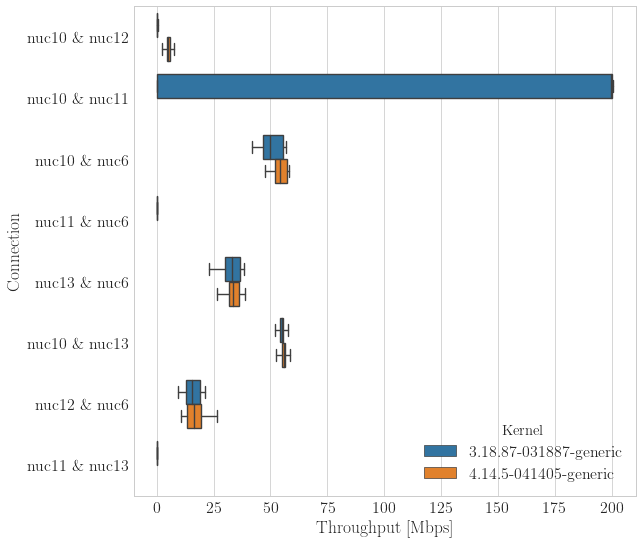

In [4]:
fig, ax = plt.subplots(figsize=(9,9))

sns.boxplot(
    x='Throughput [Mbps]',
    y='Connection',
    hue='Kernel',
    data=df,
    showfliers=False,
#     split=True,
#     cut=0,
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)
fig.savefig(str(results_folder / 'throughput_kernels.pdf'), transparent=False, bbox_inches='tight')

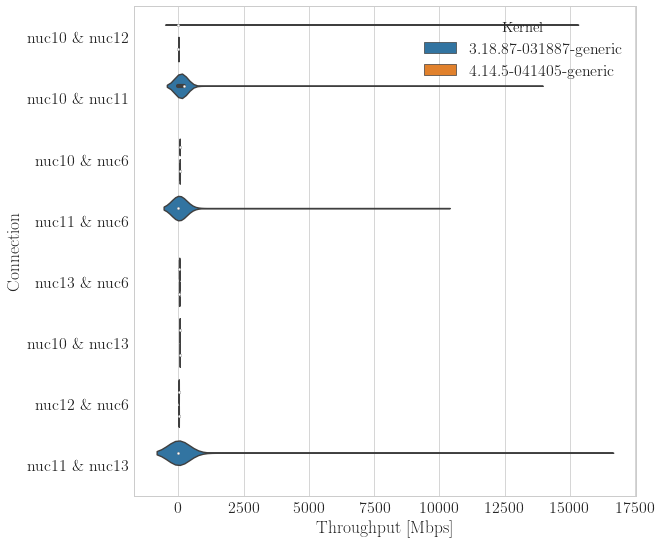

In [5]:
fig, ax = plt.subplots(figsize=(9,9))

sns.violinplot(
    x='Throughput [Mbps]',
    y='Connection',
    hue='Kernel',
    data=df,
    showfliers=False,
#     split=True,
#     cut=0,
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

In [6]:
connections = pd.pivot_table(
    df[df['Kernel'] == '4.14.5-041405-generic'],
    values='Throughput [Mbps]',
    index='Access Point',
    columns='Client',
    aggfunc=np.mean,
)
connections = connections * 1e-6

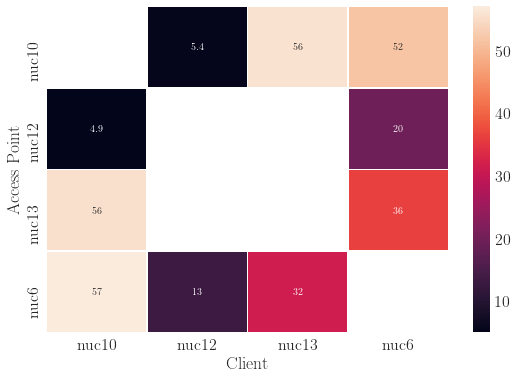

In [7]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(connections, annot=True, linewidths=.5, ax=ax)